### Housing Price Prediction Project 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [7]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
corr = X.corrwith(y).sort_values(ascending=False)

In [9]:
print(corr)

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
dtype: float64


In [10]:
X.shape

(506, 13)

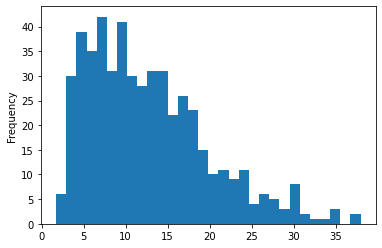

In [11]:
X['LSTAT'].plot(kind='hist', bins=30)
plt.show()

In [99]:
#X['LSTAT_CAT'] = pd.cut(X['LSTAT'], bins=[ 0, 5, 10,  15, 25, np.inf],
#      labels=['0-5', '5-10', '10-15', '15-25', '25 above'])

X['LSTAT_CAT'] = pd.cut(X['LSTAT'], bins=[ 0, 10,  15, 25, np.inf],
      labels=[1, 2, 3, 4, ])

In [100]:
X['LSTAT_CAT'].value_counts() / X.shape[0]

1    0.432806
3    0.252964
2    0.247036
4    0.067194
Name: LSTAT_CAT, dtype: float64

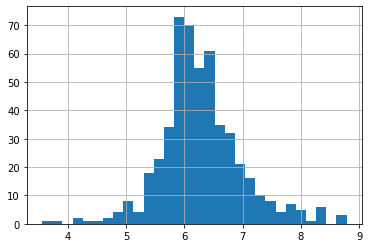

In [101]:
X['RM'].hist(bins=30)
plt.show()

In [123]:
#X['RM_CAT'] = pd.cut(X['RM'], bins=[0, 5, 5.5, 6.5, 7.5, np.inf],
#      labels= [ '0-5', '5-5.5', '5.5-6.5', '6.5-7.5', 'above 7.5'])
X['RM_CAT'] = pd.cut(X['RM'], bins=[0, 6, 6.5, 7, np.inf],
      labels= [ 1, 2, 3, 4])

In [124]:
X['RM_CAT'].value_counts() 

2    181
1    173
3     88
4     64
Name: RM_CAT, dtype: int64

In [125]:
X['LSTAT_CAT'].value_counts()

1    219
3    128
2    125
4     34
Name: LSTAT_CAT, dtype: int64

In [126]:
X['RM_CAT'].value_counts()

2    181
1    173
3     88
4     64
Name: RM_CAT, dtype: int64

In [127]:
from sklearn.model_selection import StratifiedShuffleSplit

In [128]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=9)
(train_idxs, test_idxs), = split.split(X, X[[ 'RM_CAT', 'LSTAT_CAT']])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [129]:
X.shape

(506, 15)

In [72]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'LSTAT_CAT', 'RM_CAT'],
      dtype='object')

In [60]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT_CAT,RM_CAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,4
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2,3
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,4
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2,4


In [63]:
(train_idxs, test_idxs), = split.split(X, X[[ 'RM_CAT', 'LSTAT_CAT']])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [62]:
X_train, X_test, y_train, y_test = X.iloc[train_idxs], X.iloc[test_idxs],y.iloc[train_idxs], y.iloc[test_idxs]

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
for col in ['LSTAT_CAT', 'RM_CAT']:
    for ds in [X_train, X_test]:
        ds.drop(col, axis=1, inplace=True)

In [27]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98
87,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44
330,0.04544,0.0,3.24,0.0,0.460,6.144,32.2,5.8736,4.0,430.0,16.9,368.57,9.09
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31


In [28]:
data_root_dir = "C:\\Users\\sachin\\OneDrive - Grras Solution Pvt. Ltd\\ML_BATCH_2021\\MachineLearning\\Notebooks\\datasets"

Stes to ML Project 

    1. Get Data
    2. EDA
    3. Prepare Data For ML Algorithms
    4. Select and Train Model
    5. Evalute Performance of Model
    6. Hyper Parameter Tuning
    7. Deploy & Consume
    8. Maintain, Update


In [29]:
data = np.random.normal(140, 20, 1000) # + np.random.random(1000) * 250

In [30]:
data.mean()

140.27973541394064

In [31]:
data.std()

19.85687750448036

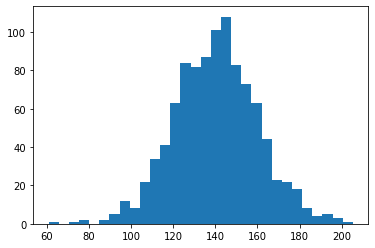

In [32]:
plt.hist(data, bins=30)
plt.show()

$$ \text {Normalized  } X_i = \frac {X_i -\bar X} {\sigma_X}$$

In [33]:
def standard_normal_form(X):
    norm = (X-X.mean()) / X.std()
    return norm

In [34]:
norm_data = standard_normal_form(data)

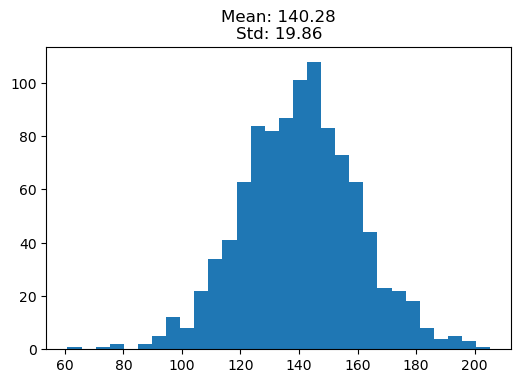

In [35]:
plt.figure(dpi=100)
plt.hist(data, bins=30)
plt.title(f'Mean: {data.mean():.2f}\nStd: {data.std():.2f}')
plt.show()

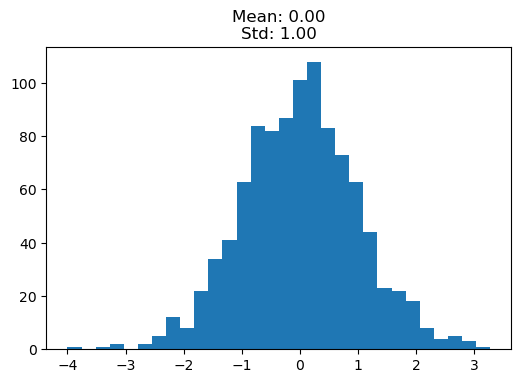

In [36]:
plt.figure(dpi=100)
plt.hist(norm_data, bins=30)
plt.title(f'Mean: {norm_data.mean():.2f}\nStd: {norm_data.std():.2f}')
plt.show()

In [37]:
import os
data_path = os.path.join(data_root_dir, 'housing\housing.csv')
housing = pd.read_csv(data_path)
housing.dropna(inplace=True)

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
X_num = housing.drop(['median_house_value', 'ocean_proximity'], axis=1).copy()

In [40]:
X_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [41]:
X_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scale = StandardScaler()

In [44]:
scale.fit(X_num)
# learning -> mean, std

StandardScaler()

In [45]:
scale.mean_

array([-119.57068859,   35.63322126,   28.63309353, 2636.50423335,
        537.87055254, 1424.94694856,  499.43346547,    3.8711616 ])

In [46]:
scale.var_

array([4.01412790e+00, 4.56375799e+00, 1.58545799e+02, 4.77516937e+06,
       1.77556687e+05, 1.28409863e+06, 1.46145545e+05, 3.60713071e+00])

In [47]:
X_num_scale = scale.transform(X_num)

X_num_scale = pd.DataFrame(X_num_scale, columns=X_num.columns)

X_num_scale.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143


In [48]:
X_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [49]:
y = housing['median_house_value']

In [50]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [51]:
print("Without Scaling")
model = SGDRegressor()
model.fit(X_num, y) # without scale
y_hat = model.predict(X_num)
print("Accuracy : ", r2_score(y, y_hat))

Without Scaling
Accuracy :  -1.1398070360582025e+21


In [52]:
print("Without Scaling")
model = SGDRegressor()
model.fit(X_num_scale, y) # without scale
y_hat = model.predict(X_num_scale)
print("Accuracy : ", r2_score(y, y_hat))

Without Scaling
Accuracy :  0.6365482582278931


    project, practial 

### Algorithm

    pipeline building 
    
    6:30 - 8:30

    One hot encoding
    
    LabelEncoding
    
    
    
    Imputer -> missing values 
    
    
    X -> [ imputer -> column_add -> column_drop -> Scaler -> Model ] -> 
    
                model